In [ ]:
#importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
cd /content/drive/"MyDrive/"

/content/drive/MyDrive


In [ ]:
dataset = pd.read_csv('Colab Notebooks/time_series_covid19_confirmed_global.csv')

#/content/drive/MyDrive/Colab Notebooks/synchronousmachine.csv

In [ ]:
dataset

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,01-02-2022,01-03-2022,01-04-2022,01-05-2022,01-06-2022,01-07-2022,01-08-2022,01-09-2022,01-10-2022,01-11-2022
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,158189,158183,158205,158245,158275,158300,158309,158381,158394,158471
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,210885,210885,212021,212021,213257,214905,214905,219694,220487,222664
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,219159,219532,219953,220415,220825,221316,221742,222157,222639,223196
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,23740,24502,24802,25289,25289,26408,26408,26408,27983,28542
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,82920,83764,84666,86636,87625,88775,89251,89718,90316,91148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,1763040,1778976,1800704,1817721,1843563,1859841,1876394,1899575,1914393,1930428
276,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,469748,469748,471090,471414,471414,471414,471414,471414,472910,473302
277,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,10130,10138,10143,10146,10152,10159,10178,10197,10197,10208
278,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,259677,261221,265479,269991,274087,278276,281576,282904,284389,287110


Analysing the dataset

In [ ]:
dataset.shape

(280, 725)

In [ ]:
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
dataf= pd.DataFrame(dataset)

In [ ]:
dataf.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,01-02-2022,01-03-2022,01-04-2022,01-05-2022,01-06-2022,01-07-2022,01-08-2022,01-09-2022,01-10-2022,01-11-2022
count,278.000000,278.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,...,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02
mean,20.156042,21.788955,1.989286,2.339286,3.360714,5.121429,7.564286,10.453571,19.921429,22.025000,...,1.036492e+06,1.045507e+06,1.054590e+06,1.063566e+06,1.072698e+06,1.083108e+06,1.090481e+06,1.097654e+06,1.109391e+06,1.119636e+06
std,25.283318,76.200169,26.590143,26.687678,33.225879,46.244243,64.627991,87.077220,213.666694,214.980193,...,4.374029e+06,4.432604e+06,4.476927e+06,4.514730e+06,4.559695e+06,4.611725e+06,4.639321e+06,4.667831e+06,4.744787e+06,4.788351e+06
min,-51.796300,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.643279,-37.713675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.226250e+03,4.274750e+03,4.427000e+03,4.470000e+03,5.481750e+03,5.481750e+03,5.481750e+03,5.481750e+03,5.933250e+03,6.122750e+03
50%,21.517170,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.707450e+04,4.707450e+04,4.852150e+04,4.852150e+04,5.022350e+04,5.115200e+04,5.116100e+04,5.117100e+04,5.139950e+04,5.192350e+04
75%,40.393350,84.992575,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.662142e+05,4.680545e+05,4.705850e+05,4.714190e+05,4.717288e+05,4.717288e+05,4.717288e+05,4.734375e+05,4.800868e+05,4.887740e+05
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,5.510700e+07,5.627838e+07,5.707760e+07,5.770099e+07,5.848785e+07,5.938869e+07,5.976742e+07,6.009056e+07,6.155608e+07,6.230847e+07


In [ ]:
col = list(dataset.columns.values)
print(col)

['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '02-01-2020', '02-02-2020', '02-03-2020', '02-04-2020', '02-05-2020', '02-06-2020', '02-07-2020', '02-08-2020', '02-09-2020', '02-10-2020', '02-11-2020', '02-12-2020', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '03-01-2020', '03-02-2020', '03-03-2020', '03-04-2020', '03-05-2020', '03-06-2020', '03-07-2020', '03-08-2020', '03-09-2020', '03-10-2020', '03-11-2020', '03-12-2020', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '04-01-2020', '04-02-2020', '04-03-2020', '04-04-2020', '04-05-2020', '04-06-2020', '04-07-2020', '04-08-2

In [ ]:
col_value = (list(dataf.sum(axis = 0, skipna = True)))
#print(col_value)
df1 = pd.DataFrame(list(zip(col, col_value)),columns =['Title', 'Values'])

#df1.set_index('Title',inplace=True)
#print(df1)
#df1.drop(df1.index[["Province/State"]])

data = df1.drop(df1.index)
print(df1)



              Title                                             Values
0    Province/State  AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
1    Country/Region                                         5603.37955
2               Lat                                        6057.329414
3              Long                                                557
4           1/22/20                                                655
..              ...                                                ...
719      01-06-2022                                          303270379
720      01-07-2022                                          305334730
721      01-08-2022                                          307343166
722      01-09-2022                                          310629511
723      01-10-2022                                          313498180

[724 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
col1 = list(df1.columns.values)
print(col1)


['Title', 'Values']


In [ ]:
x_value=df1.iloc[4:700,0:1]
y_value=df1.iloc[4:700,1:2]

In [ ]:
x_value

,Title
4,1/22/20
5,1/23/20
6,1/24/20
7,1/25/20
8,1/26/20
...,...
695,12/13/21
696,12/14/21
697,12/15/21
698,12/16/21


In [ ]:

y_value

,Values
4,655
5,941
6,1434
7,2118
8,2927
...,...
695,271491328
696,272230109
697,272967965
698,273700172


In [ ]:
#cleaning the dataset
#remove the na values
training_dataset=df1
cleaned_dataset=training_dataset.dropna()

In [ ]:
cleaned_dataset.shape

(724, 2)

In [ ]:
cleaned_dataset

,Title,Values
0,Province/State,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
1,Country/Region,5603.37955
2,Lat,6057.329414
3,Long,557
4,1/22/20,655
...,...,...
719,01-06-2022,303270379
720,01-07-2022,305334730
721,01-08-2022,307343166
722,01-09-2022,310629511


In [ ]:
x_new = cleaned_dataset['Title']

In [ ]:
y_new = cleaned_dataset['Values']

In [ ]:
x_value1=cleaned_dataset.iloc[4:700,0:1]
y_value1=cleaned_dataset.iloc[4:700,1:2]
print(x_value1)


        Title
4     1/22/20
5     1/23/20
6     1/24/20
7     1/25/20
8     1/26/20
..        ...
695  12/13/21
696  12/14/21
697  12/15/21
698  12/16/21
699  12/17/21

[696 rows x 1 columns]


In [ ]:
x_train = x_value1.values.reshape(696)

In [ ]:
y_train = y_value1.values.reshape(696)

In [ ]:
dates = x_value1['Title']
#print(dates)
date_format = [pd.to_datetime(d) for d in dates]
print(date_format)

[Timestamp('2020-01-22 00:00:00'), Timestamp('2020-01-23 00:00:00'), Timestamp('2020-01-24 00:00:00'), Timestamp('2020-01-25 00:00:00'), Timestamp('2020-01-26 00:00:00'), Timestamp('2020-01-27 00:00:00'), Timestamp('2020-01-28 00:00:00'), Timestamp('2020-01-29 00:00:00'), Timestamp('2020-01-30 00:00:00'), Timestamp('2020-01-31 00:00:00'), Timestamp('2020-02-01 00:00:00'), Timestamp('2020-02-02 00:00:00'), Timestamp('2020-02-03 00:00:00'), Timestamp('2020-02-04 00:00:00'), Timestamp('2020-02-05 00:00:00'), Timestamp('2020-02-06 00:00:00'), Timestamp('2020-02-07 00:00:00'), Timestamp('2020-02-08 00:00:00'), Timestamp('2020-02-09 00:00:00'), Timestamp('2020-02-10 00:00:00'), Timestamp('2020-02-11 00:00:00'), Timestamp('2020-02-12 00:00:00'), Timestamp('2020-02-13 00:00:00'), Timestamp('2020-02-14 00:00:00'), Timestamp('2020-02-15 00:00:00'), Timestamp('2020-02-16 00:00:00'), Timestamp('2020-02-17 00:00:00'), Timestamp('2020-02-18 00:00:00'), Timestamp('2020-02-19 00:00:00'), Timestamp('20

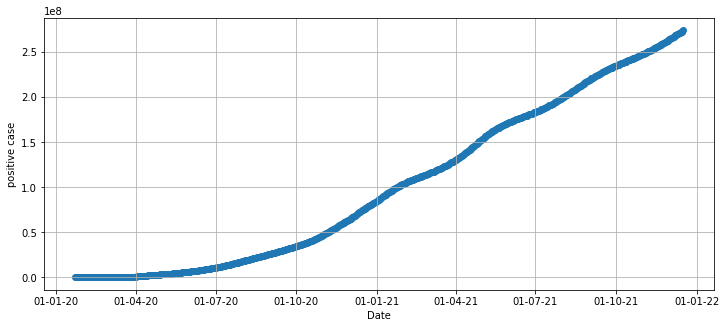

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5 ))
ax.grid()
ax.scatter(date_format,y_value1['Values'])
ax.set(xlabel="Date",ylabel="positive case")
date_form = DateFormatter('%d-%m-%y')
#print(date_form)
ax.xaxis.set_major_formatter(date_form)
#ax.xaxis.set_major_locator(mdates.DayLocator(interval = 15))
plt.show()

In [ ]:
df1['Time'] = np.arange(len(df1.index))

In [ ]:
print(df1)

              Title                                             Values  Time
0    Province/State  AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...     0
1    Country/Region                                         5603.37955     1
2               Lat                                        6057.329414     2
3              Long                                                557     3
4           1/22/20                                                655     4
..              ...                                                ...   ...
719      01-06-2022                                          303270379   719
720      01-07-2022                                          305334730   720
721      01-08-2022                                          307343166   721
722      01-09-2022                                          310629511   722
723      01-10-2022                                          313498180   723

[724 rows x 3 columns]


In [ ]:
from sklearn.linear_model import LinearRegression

# Training data
X = df1.loc[4:700:, ['Time']]  # features
y = df1.loc[4:700:, 'Values']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

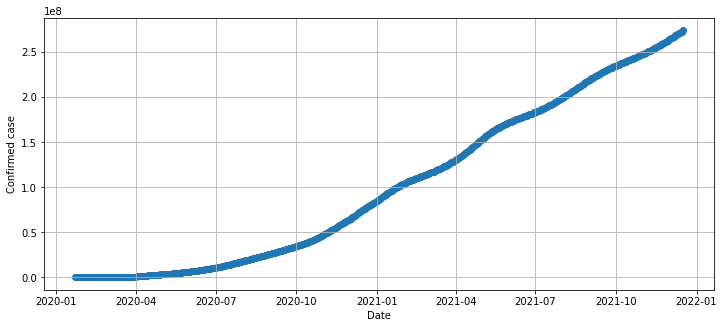

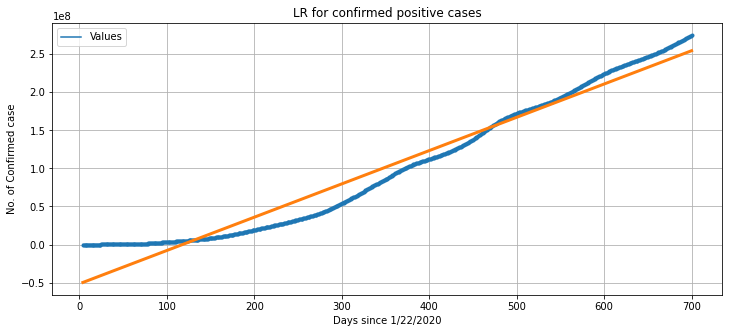

In [ ]:
plot_params = dict(
    style=".-",
    legend=True,
)

fig, ax = plt.subplots(figsize=(12, 5 ))
ax.grid()
ax.scatter(date_format,y_value1['Values'])
ax.set(xlabel="Date",ylabel="Confirmed case")

fig, ax = plt.subplots(figsize=(12, 5 ))
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('LR for confirmed positive cases');
ax.set(xlabel="Days since 1/22/2020",ylabel="No. of Confirmed case")
ax.grid();

